<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Methods" data-toc-modified-id="Methods-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Methods</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

Let us start by investigating the datasets. Our training dataset is split across two CSV files `train_time_series.csv` and `train_labels.csv`. Let us first investigate the data by forming there respective dataframes as follows

Begin by importing `pandas` and `numpy` modules. We will display the dataframes.

We also need to provide running time. We will use `perf_counter` method of `time` module

In [1]:
import time
start_time = time.perf_counter()

In [2]:
import pandas as pd
import numpy as np

train_time_series_df = pd.read_csv("train_time_series.csv", index_col=0)
display(train_time_series_df)

train_labels_df = pd.read_csv("train_labels.csv", index_col=0)
display(train_labels_df)

test_time_series_df = pd.read_csv("test_time_series.csv", index_col=0)
display(test_time_series_df)

test_labels_df = pd.read_csv("test_labels.csv", index_col=0)
display(test_labels_df)

,timestamp,UTC time,accuracy,x,y,z
20586,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046
20587,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554
20588,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467
20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985
20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450
...,...,...,...,...,...,...
24325,1565110305638,2019-08-06T16:51:45.638,unknown,0.024384,-0.710709,0.030304
24326,1565110305738,2019-08-06T16:51:45.738,unknown,0.487228,-1.099136,-0.015213
24327,1565110305838,2019-08-06T16:51:45.838,unknown,0.369446,-0.968506,0.036713
24328,1565110305939,2019-08-06T16:51:45.939,unknown,0.167877,-0.802826,0.049805


,timestamp,UTC time,label
20589,1565109931087,2019-08-06T16:45:31.087,1
20599,1565109932090,2019-08-06T16:45:32.090,1
20609,1565109933092,2019-08-06T16:45:33.092,1
20619,1565109934094,2019-08-06T16:45:34.094,1
20629,1565109935097,2019-08-06T16:45:35.097,1
...,...,...,...
24289,1565110302030,2019-08-06T16:51:42.030,4
24299,1565110303032,2019-08-06T16:51:43.032,4
24309,1565110304034,2019-08-06T16:51:44.034,4
24319,1565110305037,2019-08-06T16:51:45.037,4


,timestamp,UTC time,accuracy,x,y,z
24330,1565110306139,2019-08-06T16:51:46.139,unknown,0.034286,-1.504456,0.157623
24331,1565110306239,2019-08-06T16:51:46.239,unknown,0.409164,-1.038544,0.030975
24332,1565110306340,2019-08-06T16:51:46.340,unknown,-0.234390,-0.984558,0.124771
24333,1565110306440,2019-08-06T16:51:46.440,unknown,0.251114,-0.787003,0.054810
24334,1565110306540,2019-08-06T16:51:46.540,unknown,0.109924,-0.169510,0.235550
...,...,...,...,...,...,...
25575,1565110430975,2019-08-06T16:53:50.975,unknown,0.036499,-0.724823,0.553802
25576,1565110431075,2019-08-06T16:53:51.075,unknown,-0.159241,0.307022,0.142410
25577,1565110431175,2019-08-06T16:53:51.175,unknown,-0.037964,-0.673706,1.065445
25578,1565110431275,2019-08-06T16:53:51.275,unknown,0.255707,-1.485397,-0.013336


,timestamp,UTC time,label
24339,1565110307041,2019-08-06T16:51:47.041,NaN
24349,1565110308043,2019-08-06T16:51:48.043,NaN
24359,1565110309046,2019-08-06T16:51:49.046,NaN
24369,1565110310048,2019-08-06T16:51:50.048,NaN
24379,1565110311050,2019-08-06T16:51:51.050,NaN
...,...,...,...
25539,1565110427366,2019-08-06T16:53:47.366,NaN
25549,1565110428369,2019-08-06T16:53:48.369,NaN
25559,1565110429371,2019-08-06T16:53:49.371,NaN
25569,1565110430373,2019-08-06T16:53:50.373,NaN


Data attributes like `timestamp` and linear accelerations `x`, `y` and `z` are important for classifying the label as

|Label|Activity|
|-|-|
|1|standing|
|2|walking|
|3|stairs down|
|4|stair up|

We will first explore the data by plotting the linear acceleration along three orthogonal axes. This might help us better understand the problem.

We will use Logistic Regression for our class prediction of labels. Since this is a multi-class problem (more than two classes) and Logistic Regression is essentially a Binary Classifier, we will use **one-vs-rest strategy**. This can be implemented in Logistic Regression by setting `multi_class` parameter as `ovr` for `LogisticRegression` in `scikit-learn`

# Methods

Let us first explore the linear acceleration data along the three orthogonal axes with respect to timestamp. We will consider only the training samples which are labeled in order to get better insights of the data. Label is also plotted for each linear acceleration graph against timestamp

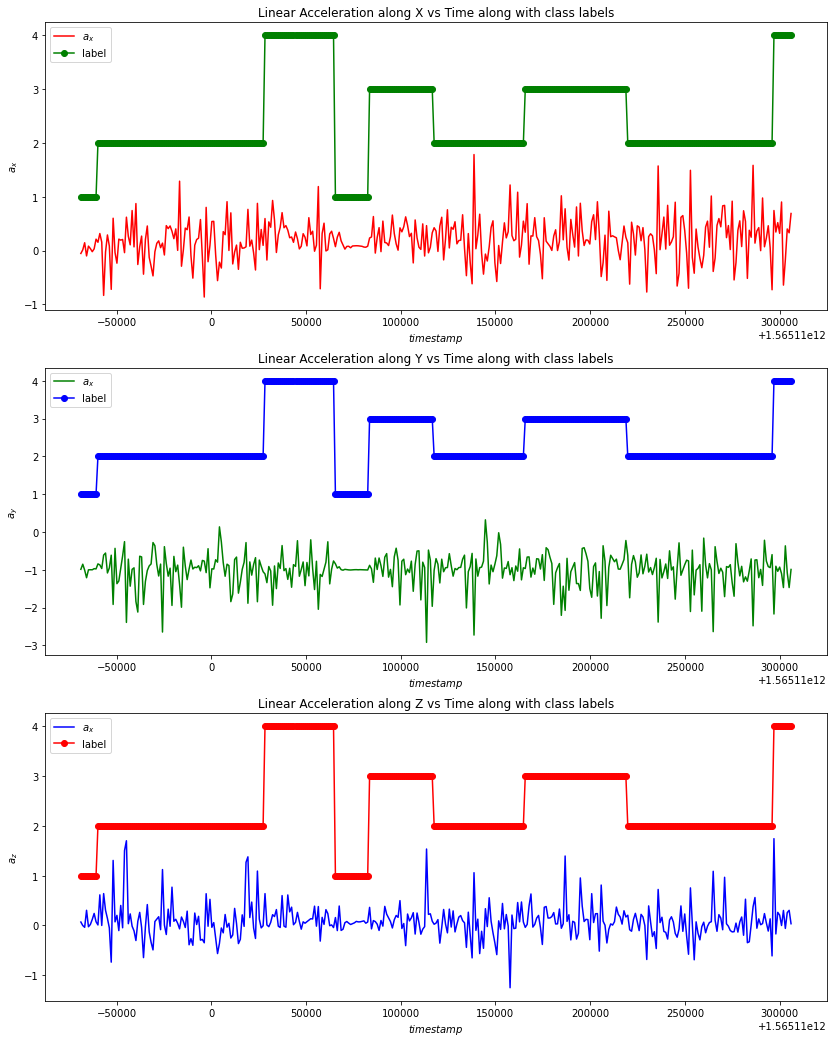

In [3]:
import matplotlib.pyplot as plt

train_time_series_trimmed_df = train_time_series_df[train_time_series_df.timestamp.isin(train_labels_df.timestamp)]

plt.figure(figsize=(14,18))
plt.subplot(3,1,1)
plt.xlabel("$timestamp$")
plt.ylabel("$a_x$")
plt.title("Linear Acceleration along X vs Time along with class labels")
plt.plot(train_time_series_trimmed_df["timestamp"], train_time_series_trimmed_df["x"], "r-", label="$a_x$");
plt.plot(train_labels_df["timestamp"], train_labels_df["label"], "go-", label="label");
plt.legend()
plt.subplot(3,1,2)
plt.xlabel("$timestamp$")
plt.ylabel("$a_y$")
plt.title("Linear Acceleration along Y vs Time along with class labels")
plt.plot(train_time_series_trimmed_df["timestamp"], train_time_series_trimmed_df["y"], "g-", label="$a_x$");
plt.plot(train_labels_df["timestamp"], train_labels_df["label"], "bo-", label="label");
plt.legend()
plt.subplot(3,1,3)
plt.xlabel("$timestamp$")
plt.ylabel("$a_z$")
plt.title("Linear Acceleration along Z vs Time along with class labels")
plt.plot(train_time_series_trimmed_df["timestamp"], train_time_series_trimmed_df["z"], "b-", label="$a_x$");
plt.plot(train_labels_df["timestamp"], train_labels_df["label"], "ro-", label="label");
plt.legend();

The above plot does not yield much information apart from the fact that acceleration remainings constant while standing, a trivial point in itself. 

Let us try to observe relation between the linear acceleration by plotting all three orthogonal linear accelerations against one another along with class labels

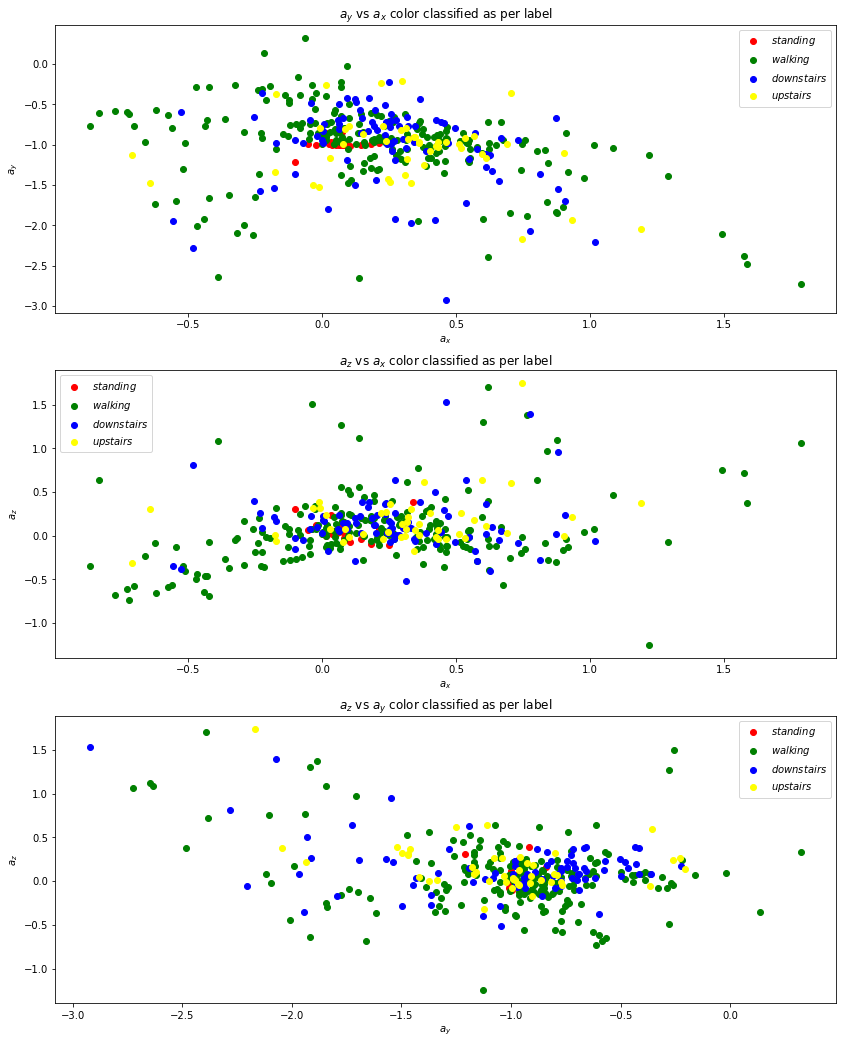

In [4]:
train_trimmed_df = pd.concat([train_time_series_trimmed_df, train_labels_df["label"]], axis=1)

train_trimmed_1_df = train_trimmed_df[train_trimmed_df["label"] == 1]
train_trimmed_2_df = train_trimmed_df[train_trimmed_df["label"] == 2]
train_trimmed_3_df = train_trimmed_df[train_trimmed_df["label"] == 3]
train_trimmed_4_df = train_trimmed_df[train_trimmed_df["label"] == 4]

plt.figure(figsize=(14,18))

plt.subplot(3,1,1)
plt.scatter(train_trimmed_1_df["x"], train_trimmed_1_df["y"], color="red", label="$standing$");
plt.scatter(train_trimmed_2_df["x"], train_trimmed_2_df["y"], color="green", label="$walking$");
plt.scatter(train_trimmed_3_df["x"], train_trimmed_3_df["y"], color="blue", label="$down stairs$");
plt.scatter(train_trimmed_4_df["x"], train_trimmed_4_df["y"], color="yellow", label="$up stairs$");
plt.xlabel("$a_x$")
plt.ylabel("$a_y$")
plt.title("$a_y$ vs $a_x$ color classified as per label")
plt.legend()

plt.subplot(3,1,2)
plt.scatter(train_trimmed_1_df["x"], train_trimmed_1_df["z"], color="red", label="$standing$");
plt.scatter(train_trimmed_2_df["x"], train_trimmed_2_df["z"], color="green", label="$walking$");
plt.scatter(train_trimmed_3_df["x"], train_trimmed_3_df["z"], color="blue", label="$down stairs$");
plt.scatter(train_trimmed_4_df["x"], train_trimmed_4_df["z"], color="yellow", label="$up stairs$");
plt.xlabel("$a_x$")
plt.ylabel("$a_z$")
plt.title("$a_z$ vs $a_x$ color classified as per label")
plt.legend()

plt.subplot(3,1,3)
plt.scatter(train_trimmed_1_df["y"], train_trimmed_1_df["z"], color="red", label="$standing$");
plt.scatter(train_trimmed_2_df["y"], train_trimmed_2_df["z"], color="green", label="$walking$");
plt.scatter(train_trimmed_3_df["y"], train_trimmed_3_df["z"], color="blue", label="$down stairs$");
plt.scatter(train_trimmed_4_df["y"], train_trimmed_4_df["z"], color="yellow", label="$up stairs$");
plt.xlabel("$a_y$")
plt.ylabel("$a_z$")
plt.title("$a_z$ vs $a_y$ color classified as per label")
plt.legend();

First we would like to merge the data from the two dataframes `train_time_series_df` and `train_labels_df` into a single dataframe called `train_df`. This `train_df` will be further used to train our model.

**_Note:_** Sampling frequency of labels is $\frac{1}{10} th$ of the accelormeter frequency for linear acceleration along the three orthogonal axes **x**, **y** and **z** 

Hence we cannot merge the two dataframes directly. We need to incorporate some kind of an approximation technique to label the samples in training dataframe for missing label values. First let us merge the two dataframes by putting `NaN` for the missing values


In [5]:
train_df = pd.concat([train_time_series_df, train_labels_df["label"]], axis=1)
display(train_df)

,timestamp,UTC time,accuracy,x,y,z,label
20586,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046,NaN
20587,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554,NaN
20588,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467,NaN
20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985,1.0
20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450,NaN
...,...,...,...,...,...,...,...
24325,1565110305638,2019-08-06T16:51:45.638,unknown,0.024384,-0.710709,0.030304,NaN
24326,1565110305738,2019-08-06T16:51:45.738,unknown,0.487228,-1.099136,-0.015213,NaN
24327,1565110305838,2019-08-06T16:51:45.838,unknown,0.369446,-0.968506,0.036713,NaN
24328,1565110305939,2019-08-06T16:51:45.939,unknown,0.167877,-0.802826,0.049805,NaN


For missing labels, we can use a rolling window function. The idea behind a rolling window function is simple. We will define a window of size n. Now we can use an approximation function to be applied to the window which will give us label for the sample of interest. We iterate over the entire list of samples. For each sample we will consider the sample label and next $n-1$ labels in the window. We will apply the approximation function over the n labels in the window giving us the label for the sample of interest. This way we will iterate over all samples of the training dataframe.

Since Sampling frequency of labels is $\frac{1}{10} th$ of the accelormeter frequency for linear acceleration along the three orthogonal axes **x**, **y** and **z**, we choose a window of size $10$

We will use `mode` as our approximation function, so that the most frequently occuring label in the neighbourhood window is used for approximation.

**_Note:_** We will only approximate lables for the missing values in our training dataframe `train_df` i.e. where label is `NaN` keeping the orginally sampled labels untouched

In [6]:
train_df = pd.concat([train_time_series_df, train_labels_df["label"]], axis=1)
train_labels = train_df["label"]
window = list(train_labels[0:10])

for i,label in train_labels.iteritems():
    if np.isnan(label):        
        train_labels[i] = pd.Series(window).mode()[0].astype(int)        
    if i+10 <= train_labels.index[-1]:
        window.append(train_labels[i+10])
    window.pop(0)
    
train_labels = train_labels.astype(int)
train_df["label"] = train_labels

<ipython-input-6-766945a1ba32>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_labels[i] = pd.Series(window).mode()[0].astype(int)


In [7]:
display(train_df)

,timestamp,UTC time,accuracy,x,y,z,label
20586,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046,1
20587,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554,1
20588,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467,1
20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985,1
20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450,1
...,...,...,...,...,...,...,...
24325,1565110305638,2019-08-06T16:51:45.638,unknown,0.024384,-0.710709,0.030304,4
24326,1565110305738,2019-08-06T16:51:45.738,unknown,0.487228,-1.099136,-0.015213,4
24327,1565110305838,2019-08-06T16:51:45.838,unknown,0.369446,-0.968506,0.036713,4
24328,1565110305939,2019-08-06T16:51:45.939,unknown,0.167877,-0.802826,0.049805,4


Let us train our model using **Logistic Regression**. We will split our training data into training and validation datasets using a $80:20$ split using `train_test_split` module from `sklearn`. This will help us determine accuracy of our trained model using `score` method of `LogisticRegression`.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = train_df[["timestamp", "x", "y", "z"]].to_numpy()

y = train_df[["label"]].to_numpy().ravel()

X_train, X_verify, y_train, y_verify = train_test_split(X, y, train_size=0.8)

clf = LogisticRegression(multi_class='ovr')
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\envs\pyResearchLibEnv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

# Results

Let us determine the accuracy score for our fitted model

In [9]:
display(clf.score(X_verify, y_verify))

0.562082777036048

Now that our model is trained, let us run it over test dataset using the same approach as described above

In [10]:
test_time_series_df = pd.read_csv("test_time_series.csv", index_col=0)
display(test_time_series_df)

test_labels_df = pd.read_csv("test_labels.csv", index_col=0)
display(test_labels_df)

,timestamp,UTC time,accuracy,x,y,z
24330,1565110306139,2019-08-06T16:51:46.139,unknown,0.034286,-1.504456,0.157623
24331,1565110306239,2019-08-06T16:51:46.239,unknown,0.409164,-1.038544,0.030975
24332,1565110306340,2019-08-06T16:51:46.340,unknown,-0.234390,-0.984558,0.124771
24333,1565110306440,2019-08-06T16:51:46.440,unknown,0.251114,-0.787003,0.054810
24334,1565110306540,2019-08-06T16:51:46.540,unknown,0.109924,-0.169510,0.235550
...,...,...,...,...,...,...
25575,1565110430975,2019-08-06T16:53:50.975,unknown,0.036499,-0.724823,0.553802
25576,1565110431075,2019-08-06T16:53:51.075,unknown,-0.159241,0.307022,0.142410
25577,1565110431175,2019-08-06T16:53:51.175,unknown,-0.037964,-0.673706,1.065445
25578,1565110431275,2019-08-06T16:53:51.275,unknown,0.255707,-1.485397,-0.013336


,timestamp,UTC time,label
24339,1565110307041,2019-08-06T16:51:47.041,NaN
24349,1565110308043,2019-08-06T16:51:48.043,NaN
24359,1565110309046,2019-08-06T16:51:49.046,NaN
24369,1565110310048,2019-08-06T16:51:50.048,NaN
24379,1565110311050,2019-08-06T16:51:51.050,NaN
...,...,...,...
25539,1565110427366,2019-08-06T16:53:47.366,NaN
25549,1565110428369,2019-08-06T16:53:48.369,NaN
25559,1565110429371,2019-08-06T16:53:49.371,NaN
25569,1565110430373,2019-08-06T16:53:50.373,NaN


In [11]:
test_df = pd.concat([test_time_series_df, test_labels_df["label"]], axis=1)
display(test_df)

test_time_series_trimmed_df = test_time_series_df[test_time_series_df.timestamp.isin(test_labels_df.timestamp)]
display(test_time_series_trimmed_df)

,timestamp,UTC time,accuracy,x,y,z,label
24330,1565110306139,2019-08-06T16:51:46.139,unknown,0.034286,-1.504456,0.157623,NaN
24331,1565110306239,2019-08-06T16:51:46.239,unknown,0.409164,-1.038544,0.030975,NaN
24332,1565110306340,2019-08-06T16:51:46.340,unknown,-0.234390,-0.984558,0.124771,NaN
24333,1565110306440,2019-08-06T16:51:46.440,unknown,0.251114,-0.787003,0.054810,NaN
24334,1565110306540,2019-08-06T16:51:46.540,unknown,0.109924,-0.169510,0.235550,NaN
...,...,...,...,...,...,...,...
25575,1565110430975,2019-08-06T16:53:50.975,unknown,0.036499,-0.724823,0.553802,NaN
25576,1565110431075,2019-08-06T16:53:51.075,unknown,-0.159241,0.307022,0.142410,NaN
25577,1565110431175,2019-08-06T16:53:51.175,unknown,-0.037964,-0.673706,1.065445,NaN
25578,1565110431275,2019-08-06T16:53:51.275,unknown,0.255707,-1.485397,-0.013336,NaN


,timestamp,UTC time,accuracy,x,y,z
24339,1565110307041,2019-08-06T16:51:47.041,unknown,0.098282,-0.833771,0.118042
24349,1565110308043,2019-08-06T16:51:48.043,unknown,0.348465,-0.946701,-0.051041
24359,1565110309046,2019-08-06T16:51:49.046,unknown,0.377335,-0.849243,-0.026474
24369,1565110310048,2019-08-06T16:51:50.048,unknown,0.110077,-0.520325,0.312714
24379,1565110311050,2019-08-06T16:51:51.050,unknown,0.283478,-0.892548,-0.085876
...,...,...,...,...,...,...
25539,1565110427366,2019-08-06T16:53:47.366,unknown,-0.043915,-0.242416,0.068802
25549,1565110428369,2019-08-06T16:53:48.369,unknown,0.118271,-1.212097,0.357468
25559,1565110429371,2019-08-06T16:53:49.371,unknown,0.667404,-0.978851,0.171906
25569,1565110430373,2019-08-06T16:53:50.373,unknown,0.371384,-1.021927,-0.244446


In [12]:
X_test = test_time_series_trimmed_df[["timestamp", "x", "y", "z"]].to_numpy()
test_labels = clf.predict(X_test)
print(test_labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


 Predicted labels for the test set are to be submitted as a list of numbers seperated by a comma without the enclosing brackets. Let us format it as a string

In [13]:
predictions = ",".join(map(str, test_labels))
print(predictions)

2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [14]:
print(f"Running time is {time.perf_counter() - start_time} seconds")

Running time is 10.588734799999983 seconds


Let us update the predicted labels in `test_labels.csv`

In [15]:
test_labels_df["label"] = test_labels
test_labels_df.to_csv("test_labels.csv")

Let us verify the labels have been updated properly in the `test_labels.csv` file

In [16]:
test_labels_df = pd.read_csv("test_labels.csv", index_col=0)
display(test_labels_df)

,timestamp,UTC time,label
24339,1565110307041,2019-08-06T16:51:47.041,2
24349,1565110308043,2019-08-06T16:51:48.043,2
24359,1565110309046,2019-08-06T16:51:49.046,2
24369,1565110310048,2019-08-06T16:51:50.048,2
24379,1565110311050,2019-08-06T16:51:51.050,2
...,...,...,...
25539,1565110427366,2019-08-06T16:53:47.366,2
25549,1565110428369,2019-08-06T16:53:48.369,2
25559,1565110429371,2019-08-06T16:53:49.371,2
25569,1565110430373,2019-08-06T16:53:50.373,2


# Conclusion

Our model accuracy is decent. It seems to be skewed towards walking classification as all test samples have been labeled in class 2 i.e. Walking. This is possibly due to the fact tha most of the data in training dataset is labeled as Walking. This is essentially as good as labelling every sample as Walking as it is the most probable state.